In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# DATA PREPROCESSING

In [64]:
train = pd.read_csv(r'customer_behavior_train.csv')
test  = pd.read_csv(r'customer_behavior_test.csv')

In [65]:
train.head(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,2.29,5.37,1,10.00,Facebook,143.14,D,1
1,7.49,16.36,0,25.52,Instagram,136.66,A,1
2,5.71,13.69,0,10.00,Google,67.13,C,0
3,1.23,3.22,1,41.49,Google,92.12,C,0
4,3.55,10.72,0,21.57,Direct,70.31,B,0


In [66]:
test.head(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,3.33,12.76,0,27.66,Google,131.60,C,0
1,3.75,10.20,0,15.05,Direct,41.63,C,0
2,6.55,16.40,0,105.27,Facebook,98.72,A,1
3,6.42,19.68,1,21.17,Direct,180.20,D,0
4,8.38,30.59,0,91.31,Instagram,58.70,B,1


In [67]:
train.shape , test.shape

((1800, 8), (450, 8))

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          450 non-null    float64
 1   Pages_viewed          450 non-null    float64
 2   Clicked_ad            450 non-null    int64  
 3   Cart_value            450 non-null    float64
 4   Referral              450 non-null    object 
 5   Browser_Refresh_Rate  450 non-null    float64
 6   Last_Ad_Seen          450 non-null    object 
 7   Purchase              450 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 28.3+ KB


**conclusion**:  no null values, dataset is pretty small

In [70]:
train.describe()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,4.962244,12.429483,0.301111,50.352933,100.662100,0.292222
std,2.336373,6.381941,0.458868,47.443390,51.645694,0.454910
min,0.500000,0.760000,0.000000,10.000000,-65.800000,0.000000
25%,3.300000,7.860000,0.000000,13.862500,65.430000,0.000000
50%,4.935000,12.020000,0.000000,34.690000,99.735000,0.000000
75%,6.610000,16.500000,1.000000,67.630000,134.755000,1.000000
max,10.000000,35.340000,1.000000,300.000000,303.400000,1.000000


In [71]:
test.describe()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.047133,12.800111,0.353333,52.160156,100.142622,0.302222
std,2.412017,6.987936,0.478537,47.486090,50.234428,0.459732
min,0.500000,0.580000,0.000000,10.000000,-38.790000,0.000000
25%,3.335000,7.622500,0.000000,15.135000,65.790000,0.000000
50%,5.010000,12.255000,0.000000,36.375000,102.360000,0.000000
75%,6.720000,16.767500,1.000000,70.055000,133.880000,1.000000
max,10.000000,36.900000,1.000000,290.990000,252.030000,1.000000


**conclusion**: there is skeweness in data.
                Cart_value and Pages_viewed are right skewed (why? : because mean>median)

In [72]:
len(train[train['Browser_Refresh_Rate']<0]), len(test[test['Browser_Refresh_Rate']<0])

(38, 14)

there are negative values probably errors in data.

In [73]:
train.duplicated().sum(), test.duplicated().sum()

(np.int64(0), np.int64(0))

In [74]:
train.corr(numeric_only=True)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
Time_on_site,1.000000,0.906873,-0.019618,0.021560,0.011260,0.344128
Pages_viewed,0.906873,1.000000,-0.011645,0.005392,0.019562,0.358996
Clicked_ad,-0.019618,-0.011645,1.000000,0.048734,0.008641,0.283907
Cart_value,0.021560,0.005392,0.048734,1.000000,-0.042083,0.137851
Browser_Refresh_Rate,0.011260,0.019562,0.008641,-0.042083,1.000000,-0.005686
Purchase,0.344128,0.358996,0.283907,0.137851,-0.005686,1.000000


# **SUBTASK 0 : EDA**

## UNIVARIATE ANALYSIS

In [133]:
num_cols = ['Time_on_site','Pages_viewed','Cart_value','Browser_Refresh_Rate']
cat_cols = ['Clicked_ad','Last_Ad_Seen','Referral']

<Axes: ylabel='count'>

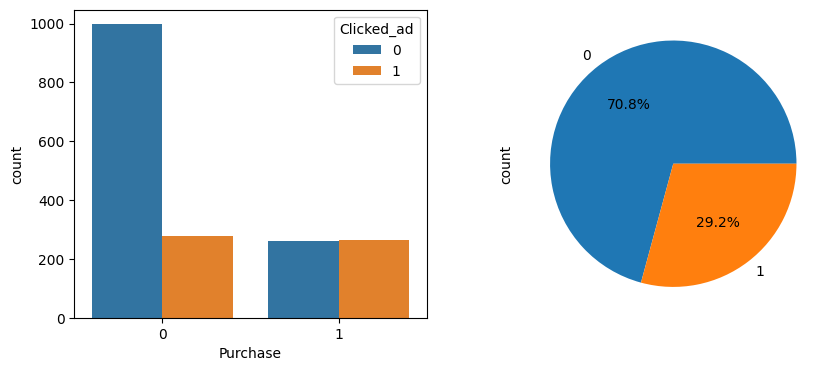

In [76]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x='Purchase',data=train,hue='Clicked_ad')

plt.subplot(1,2,2)
train['Purchase'].value_counts().plot.pie(autopct='%1.1f%%')


conclusion: Class imbalancy in target column

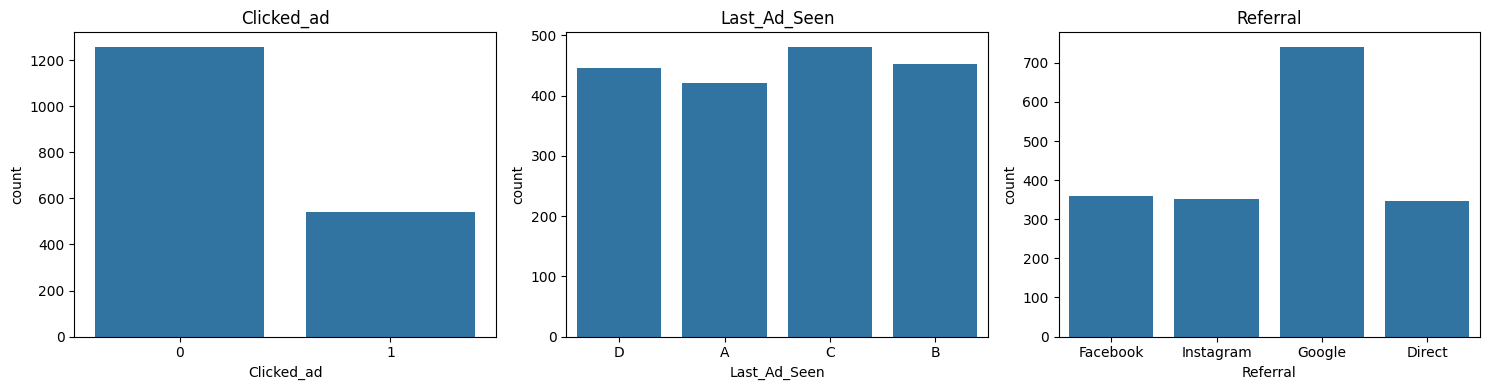

In [77]:
ncols = 3
nrows = (len(cat_cols)//ncols)
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)


for i, col in enumerate(cat_cols):
    q,r = divmod(i,ncols)
    sns.countplot(x=col,data=train,ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

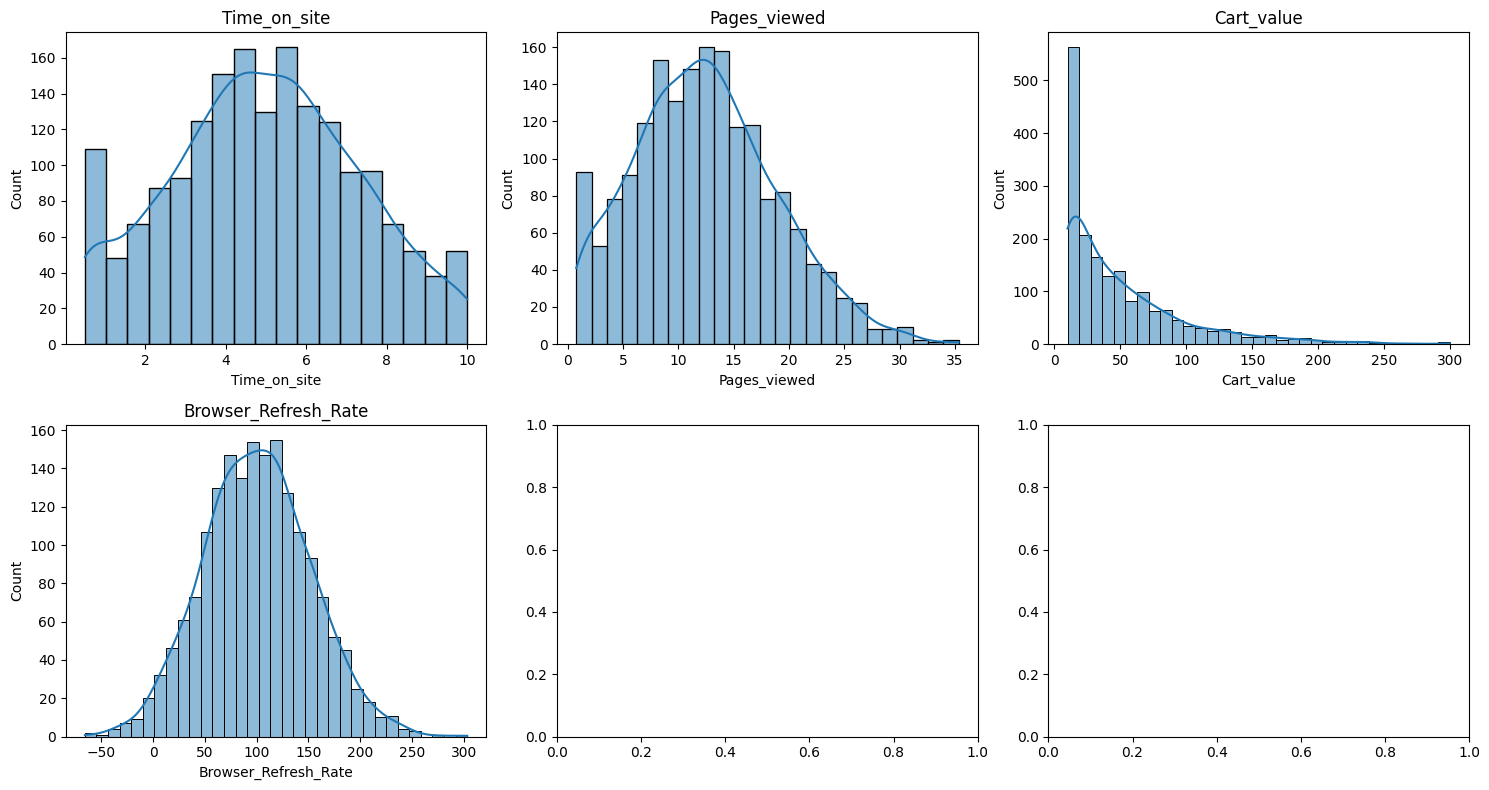

In [78]:
# plotting hisplots of numerical features of training dataset

#initializing subplot 
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

#plotting
for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.histplot(train[col],ax=axis[q][r],kde=True)
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

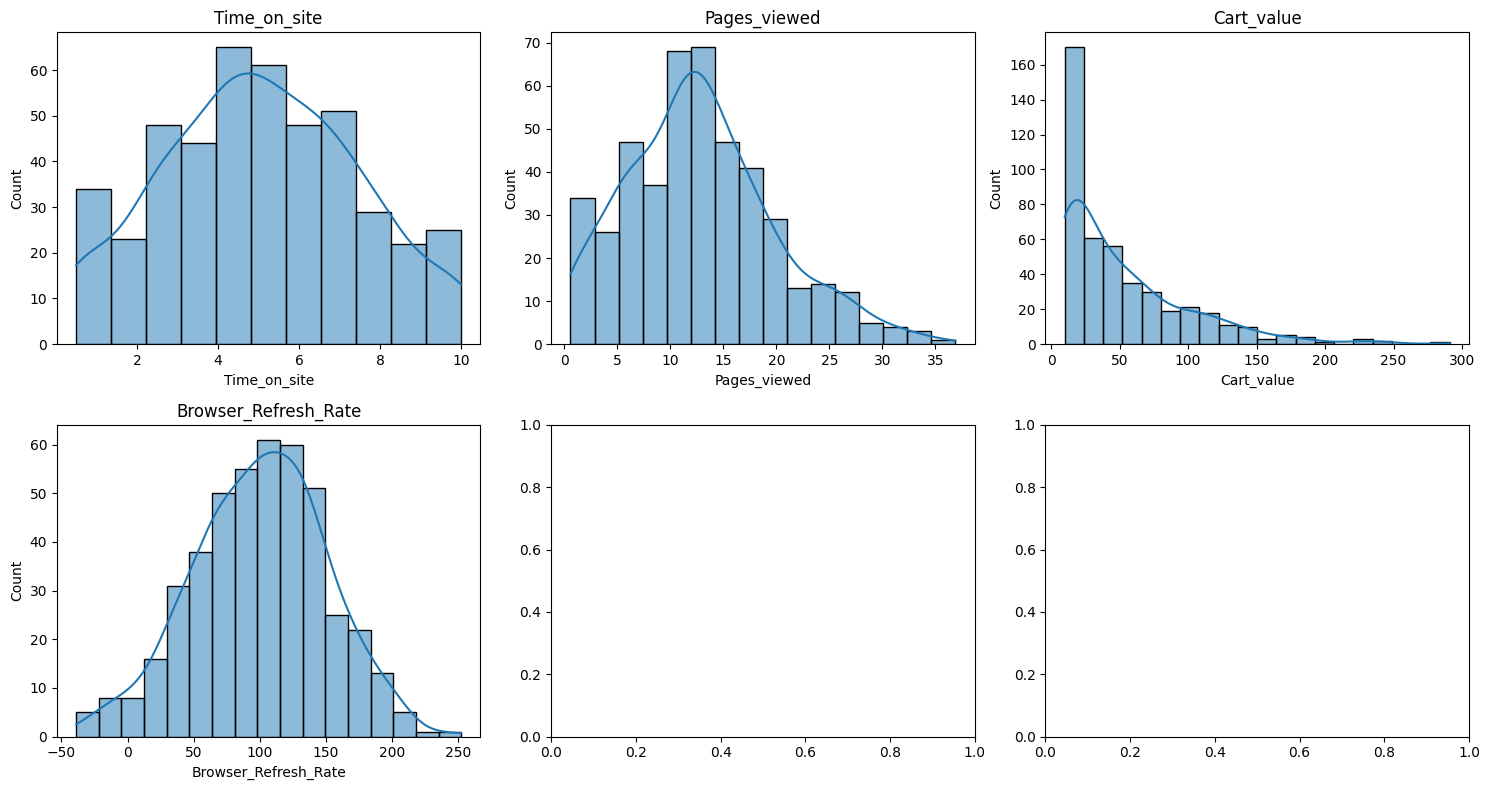

In [79]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.histplot(test[col],ax=axis[q][r],kde=True)
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

**Conclusion**: Right skewness in Pages_viewed and heavy right Skewness in Cart_value & Negative values in Browser_Refresh_Rate.

**-->Solution**: apply log1p() on both right skewed feature and maybe clipping on Browser_Refresh_Rate or drop the feature.

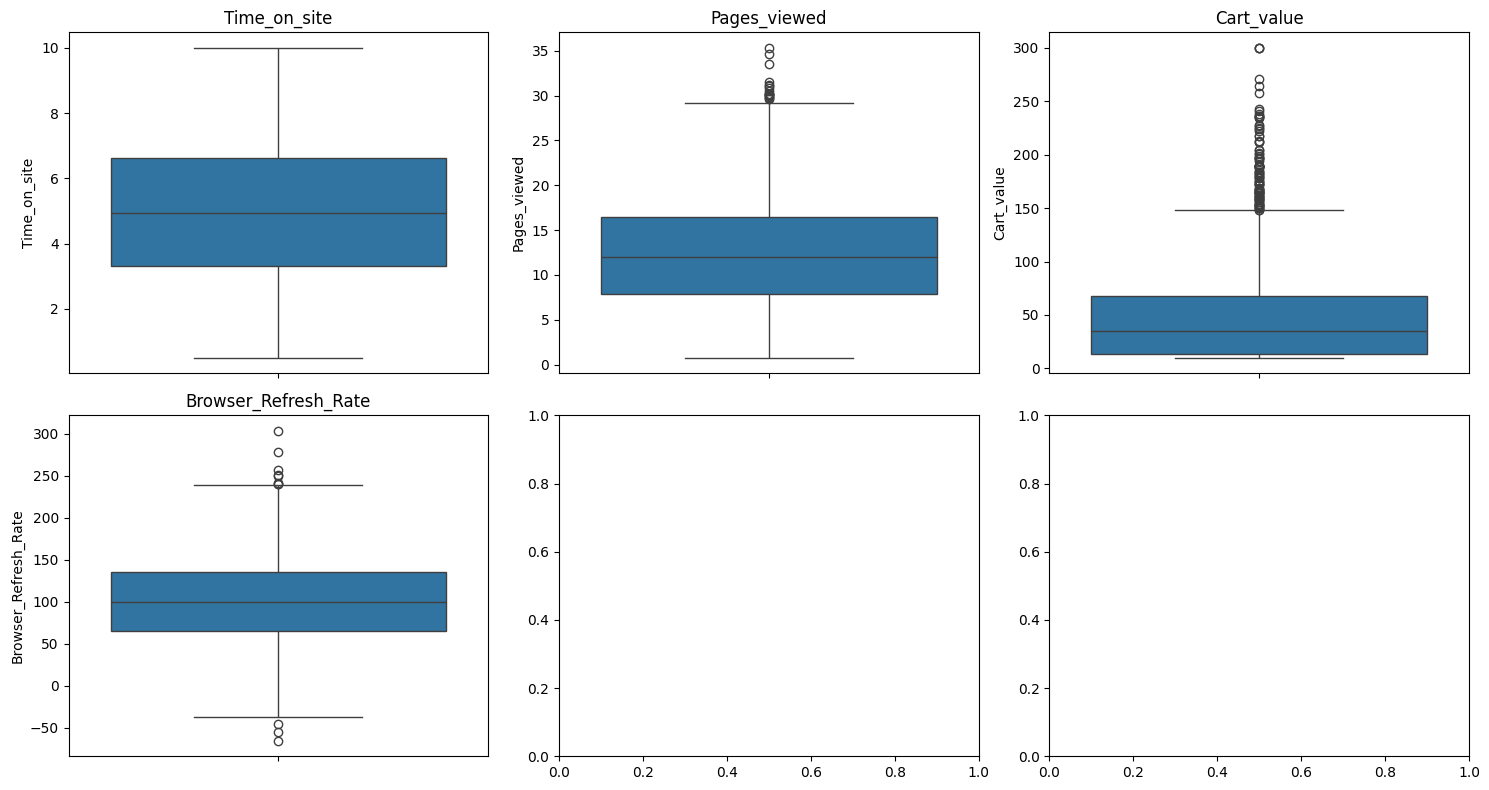

In [80]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.boxplot(train[col],ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

**Conclusion**: There are outliers in Pages_viewed and Cart_value but they doesn't feels like error in data they looks legit. but in Browser_Refresh_Rate it has both positive and negative outliers. we can use clipping to handle these outliers

## MULTIVARIATE ANALYSIS


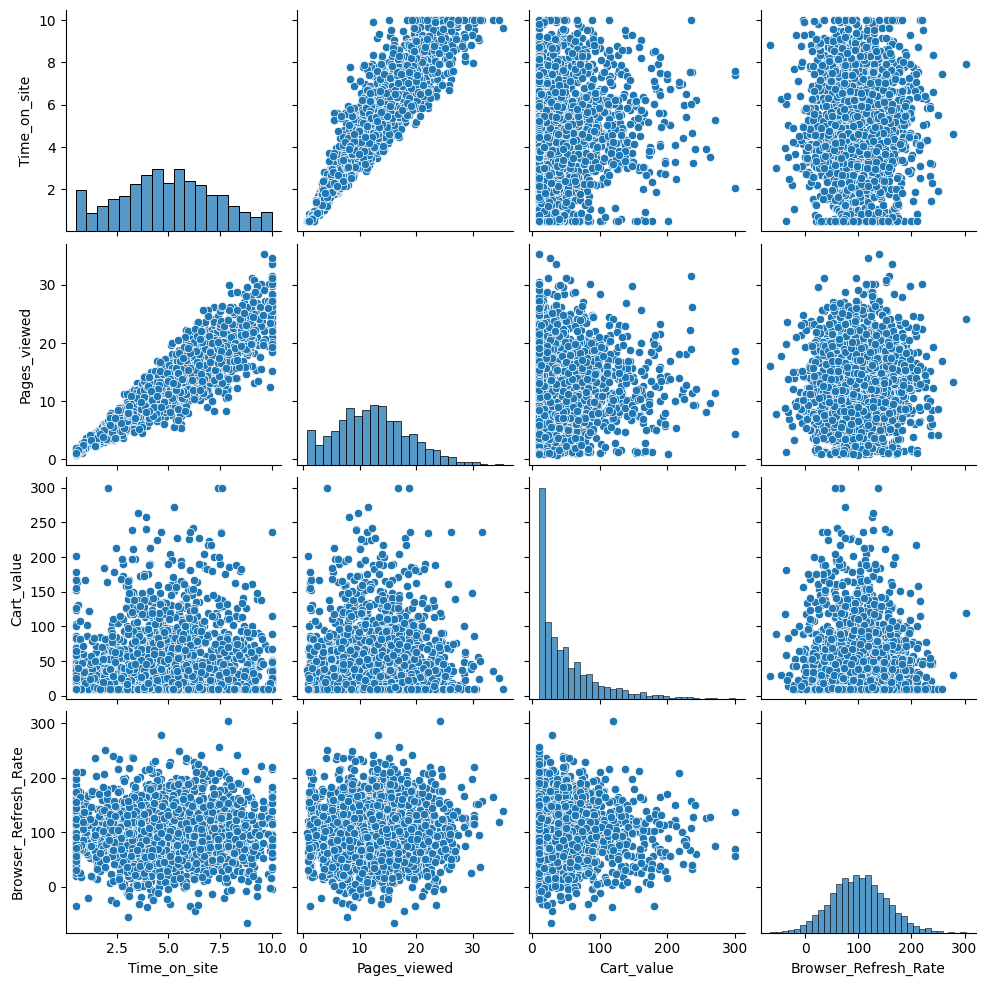

In [81]:
sns.pairplot(train[num_cols])

**Conclusion**: Strong & positive correlation between Pages_viewed and Time_on_site, 

<Axes: >

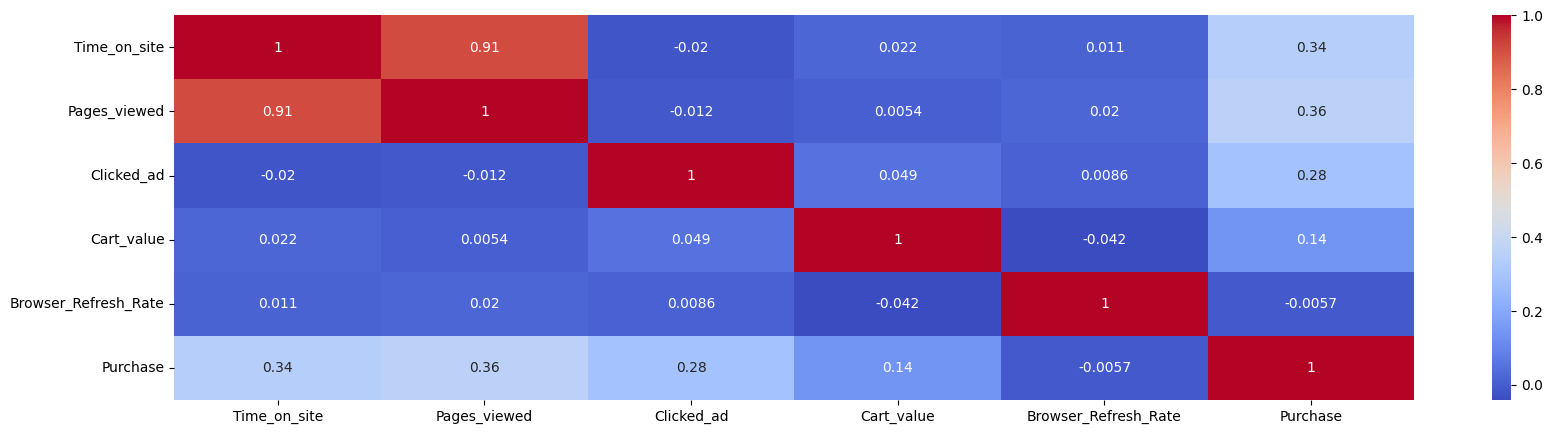

In [82]:
plt.figure(figsize=(20,5))
sns.heatmap(train.corr(numeric_only=True),cmap='coolwarm',annot=True)

Conclusion: Mulyi_collinearity between Pages_viewed and Clicked_ad. it can cause problem in linear models & maybe we can drop Br**Conclusion**: 
1. there is not strong correlation between features and target.
2. There is multi collinearity between Pages_viewed and Clicked_ad. it can cause problem in linear models.

## FEATURE ENGG

In [173]:
train = pd.read_csv(r'customer_behavior_train.csv')
test  = pd.read_csv(r'customer_behavior_test.csv')

In [174]:
# removing outliers
train['Browser_Refresh_Rate'] = train['Browser_Refresh_Rate'].clip(lower=0)
test['Browser_Refresh_Rate'] = test['Browser_Refresh_Rate'].clip(lower=0)
train['Browser_Refresh_Rate'] = train['Browser_Refresh_Rate'].clip(upper=250)
test['Browser_Refresh_Rate'] = test['Browser_Refresh_Rate'].clip(upper=250)


train['Cart_value'] = train['Cart_value'].clip(upper=200)
test['Cart_value'] = test['Cart_value'].clip(upper=200)

train['Pages_viewed'] = train['Pages_viewed'].clip(upper=30)
test['Pages_viewed'] = test['Pages_viewed'].clip(upper=30)

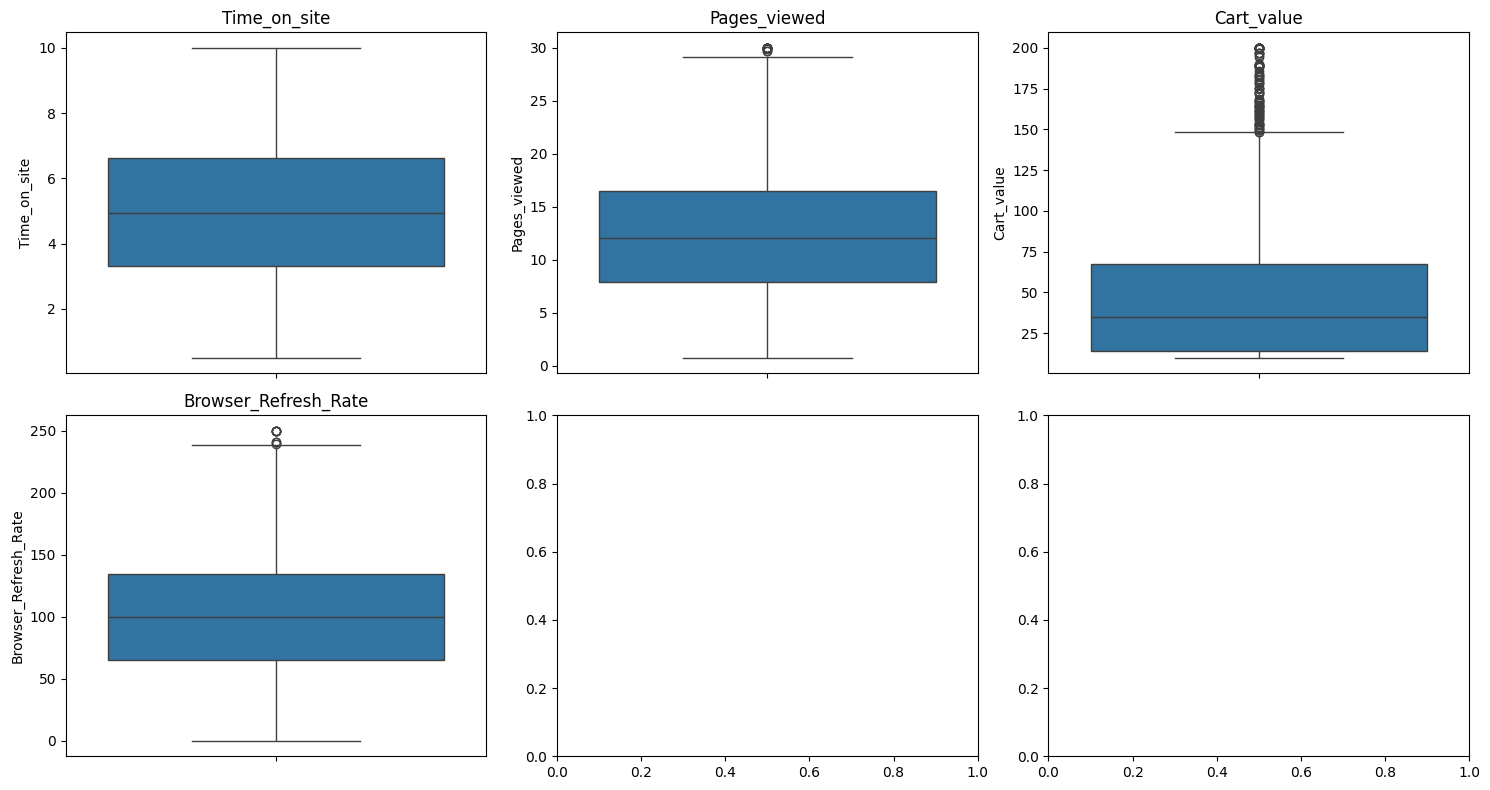

In [175]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.boxplot(train[col],ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

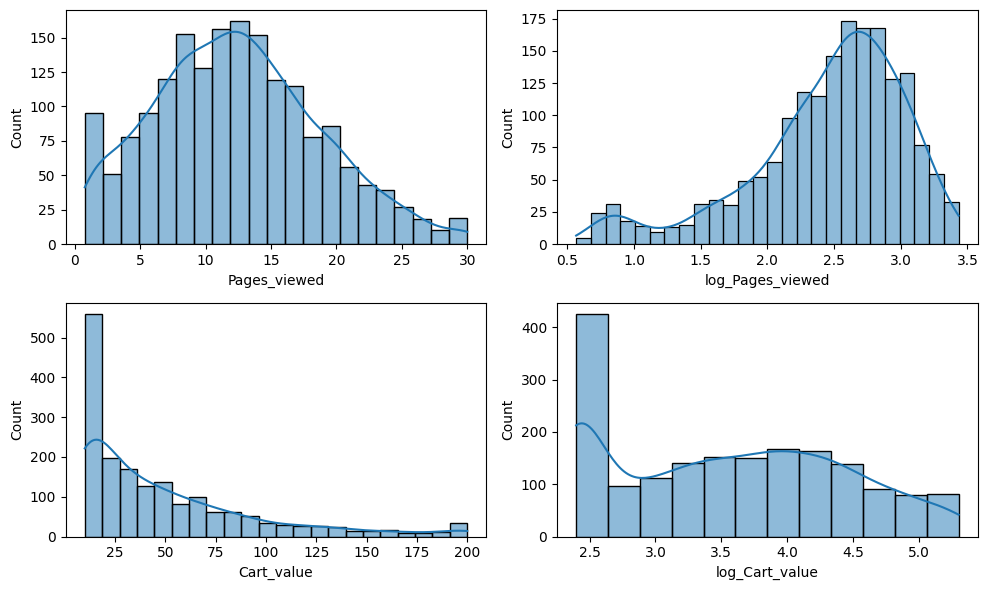

In [176]:
# applying log transformation on right skewed columns and then plotting them side by side to check the results after

rs_cols = ['Pages_viewed','Cart_value']
fig,axis= plt.subplots(ncols=2,nrows=len(rs_cols),figsize=(10,3*len(rs_cols)))

for j, col in enumerate(rs_cols):
    train[f'log_{col}'] = np.log1p(train[col])

    sns.histplot(data=train,x=col,ax=axis[j][0],kde=True)

    sns.histplot(data=train,x=f'log_{col}',ax=axis[j][1],kde=True)


plt.tight_layout()
plt.show()


#for test dataset
for col in rs_cols:
    test[f'log_{col}'] = np.log1p(test[col])


# Dropping those skewed features and keeping the their transformed version.
train = train.drop(columns=rs_cols)
test = test.drop(columns=rs_cols)

In [177]:
# creating new features

def new_features(df):
    df['time/pages'] = df['Time_on_site']/df['log_Pages_viewed']
    df['time*pages'] = df['Time_on_site']*df['log_Pages_viewed']
    df['time+pages'] = df['Time_on_site']+df['log_Pages_viewed']
    df['ad/time'] = df['Clicked_ad']/df['Time_on_site']#
    df['ad+time'] = df['Clicked_ad']+df['Time_on_site']
    df['ad*time'] = df['Clicked_ad']*df['Time_on_site']#
    df['ad/page'] = df['Clicked_ad']/df['log_Pages_viewed']
    df['ad+page'] = df['Clicked_ad']+df['log_Pages_viewed']#
    df['ad+page+time'] = df['Clicked_ad']+df['log_Pages_viewed']+df['Time_on_site']#
    df['ad*page'] = df['Clicked_ad']*df['log_Pages_viewed']#

    return df

train = new_features(train)
test = new_features(test)

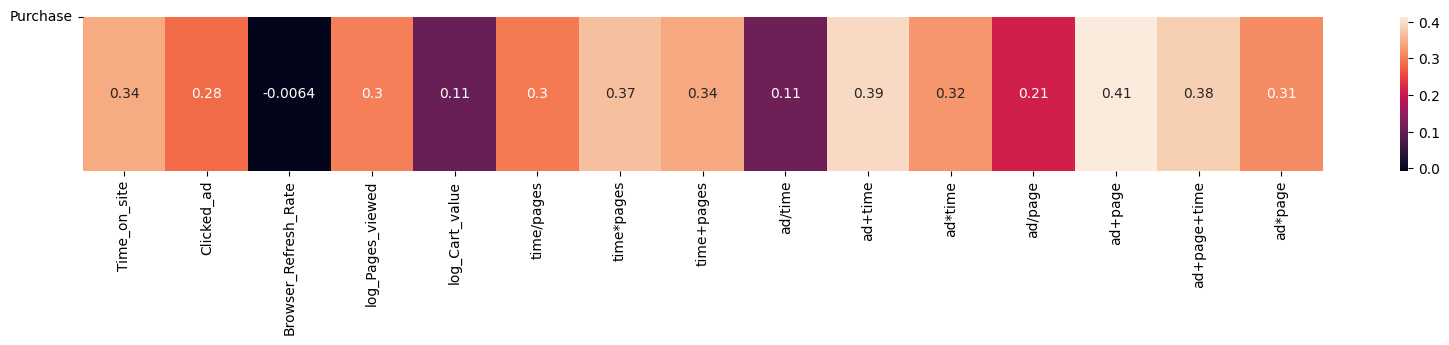

In [178]:
# for checking the correlation of features with Target feature and new features created above 

corr = train.corr(numeric_only=True)
label_corr = corr['Purchase']

label_corr = label_corr.drop('Purchase').values.reshape(1, -1)

plt.figure(figsize=(20,2))
sns.heatmap(label_corr, annot=True, xticklabels=corr.columns.drop('Purchase'))
plt.yticks([0], ['Purchase'], rotation=0)  # Add label to the y-axis
plt.show()

In [179]:
# separating target and features and dropping Browser_Refresh_Rate

X_train = train.drop(columns=['Purchase'],axis=1)
X_test = test.drop(columns=['Purchase'],axis=1)

y_train = train['Purchase']
y_test = test['Purchase']

In [180]:
# Applying OneHotEncoder and Scaling the features.

new_num_cols = ['Time_on_site','log_Pages_viewed','log_Cart_value','Browser_Refresh_Rate']
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(drop='first',sparse_output=False)
scaler = StandardScaler()

ct = ColumnTransformer(transformers=[('encoder',encoder,cat_cols)
                                     ,('scaler',scaler,new_num_cols)],remainder='passthrough')

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# **SUBTASK 1: Model Selection and Explanation**

## ***Model 1: Logistic Regression***
### 1.Mathematical formulation:

>The model calculates the probability of belonging to a particular class using sigmoid/logistic function.

![Screenshot 2025-05-31 130538.png](<attachment:Screenshot 2025-05-31 130538.png>)
here w is weight matrix, x is matrix of input features and b is bias


>loss function: binary cross entropy loss

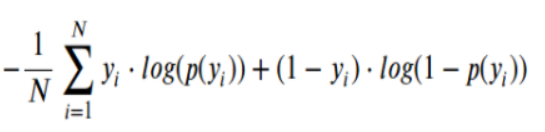
here: yi hat is predicted probability and yi is true label (0,1)

### 2.Assumptions:

1. input features are linearly seperable
2. there is no multicollinearity among features themself
3. the target is binary i.e. 0 or 1
4. and all the observations are independent not depending on any other observation.

### 3.How the model makes predictions

1. at first the model calculates the weighted sum of input variables and addding a bias term
2. then that output is passed to sigmoid/logistic function which outputs probabilty between 0 and 1
3. using a threshold = 0.5 the class is identified.
4. at last .the model then updates its weights and biases using gradient descent the weights and biases are updated iteratively to reduce the loss.

### 4. why logistic regression?

1. Easily interpretable model.
2. it works well for small datasets and binary classification problems.



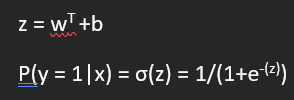

## ***Model 2: Random Forest classifier***

### 1.Mathematical Formulation
>Random forest model is ensemble od decision trees. each tree is trained on bootstrap sample. at each split random subset of features are used.

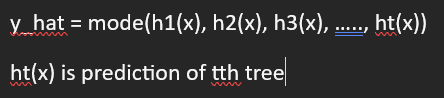

>loss function: Unlike logistic regression Random forest itself doesn't have a loss function to minimise instead the constituent tree minimizes their loss function (gini impurity/entropy) by choosing appropiate features for splitting.

### 2.Assumptions

1. all the constituent trees are assumed to be uncorrelated and have low bias & high variance. after ensembling the variance reduces.
2. no need of feature scaling and if data is not uniformaly distributed.

### 3.How the model makes predictions

1. first multiple decision trees are trained parallely on diffrent subsets of data and features
2. each tree makes prediction
3. final prediction is based on majority voting for classification and averaging predictions in regressions


### 4.why Random Forest classifier

1. outliers in the data won't affect the performance
2. we can get the values of feature importance for better interpretability
3. it handles non-linear relations of data 
4. it can handle the noisy features very well


# **SUBTASK 2: Model Training and Evaluation**

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train_transformed,y_train)

RandomForestClassifier(class_weight='balanced')

In [190]:
pred = rf_clf.predict(X_test_transformed)
train_pred = rf_clf.predict(X_train_transformed)

print(f"train_accuracy: {accuracy_score(y_train,train_pred)}\n")
print(f"test_accuracy: {accuracy_score(y_test,pred)}\n")
print(f"f1_score: {f1_score(y_test,pred)}\n")
print(confusion_matrix(y_test,pred))


rf_model_before_tuning = {
    'train_accuracy': accuracy_score(y_train,train_pred),
    'test_accuracy': accuracy_score(y_test,pred),
    'f1_score':f1_score(y_test,pred)
}

train_accuracy: 1.0

test_accuracy: 0.8

f1_score: 0.6484375

[[277  37]
 [ 53  83]]


In [93]:
pd.DataFrame(rf_clf.feature_importances_)

,0
0,0.009433
1,0.008244
2,0.008718
3,0.010573
4,0.009048
5,0.011197
6,0.007598
7,0.061362
8,0.082488
9,0.087391


In [191]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(class_weight='balanced',max_iter=1000)

lr_clf.fit(X_train_transformed,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [192]:
pred1 = lr_clf.predict(X_test_transformed)
train_pred1 = lr_clf.predict(X_train_transformed)

print(f"train_accuracy: {accuracy_score(y_train,train_pred1)}\n")
print(f"accuracy: {accuracy_score(y_test,pred1)}\n")
print(f"f1_score: {f1_score(y_test,pred1)}\n")
print(confusion_matrix(y_test,pred1))


lr_model_before_tuning = {
    'train_accuracy': accuracy_score(y_train,train_pred1),
    'test_accuracy': accuracy_score(y_test,pred1),
    'f1_score':f1_score(y_test,pred1)
}

train_accuracy: 0.7338888888888889

accuracy: 0.7111111111111111

f1_score: 0.6306818181818182

[[209 105]
 [ 25 111]]


# **SUBTASK 3: Hyperparameter Tuning**

In [150]:
# Hyperparameter Tuning of RandomForestClassifier model

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint,uniform,loguniform

rf_clf = RandomForestClassifier(class_weight='balanced')
param = {
    'n_estimators':randint(50,600),
    'criterion': ['gini', 'entropy', 'log_loss'] ,
    'max_depth': randint(2,30),
    'min_samples_split': randint(2,20),
    'min_samples_leaf': randint(1,20),
    'max_features': uniform(0.1,0.9),
    'max_leaf_nodes': randint(2,20),
    'bootstrap':[True,False],
}

rs_cv = RandomizedSearchCV(estimator=rf_clf,param_distributions=param,n_iter=50,cv=5,scoring='accuracy',n_jobs=-1)
rs_cv.fit(X_train_transformed,y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002813CB3D250>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_fro...
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002813C8A2DF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002813CAEF960>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002813CAEF490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002813CB3D310>},
                   scoring='accuracy')

In [153]:
rs_cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': np.float64(0.9369180312243436),
 'max_leaf_nodes': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 104}

In [154]:
my_model = rs_cv.best_estimator_
my_model.fit(X_train_transformed,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=18,
                       max_features=np.float64(0.9369180312243436),
                       max_leaf_nodes=15, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=104)

In [155]:
my_pred = my_model.predict(X_test_transformed)
my_pred_train = my_model.predict(X_train_transformed)


print(f'train_accuracy: {accuracy_score(y_train,my_pred_train)}\n')
print(f'accuracy: {accuracy_score(y_test,my_pred)}\n')
print(f'f1_score: {f1_score(y_test,my_pred)}\n')
print(confusion_matrix(y_test,my_pred))

rf_model_after_tuning = {
    'train_accuracy': accuracy_score(y_train,my_pred_train),
    'test_accuracy': accuracy_score(y_test,my_pred),
    'f1_score':f1_score(y_test,my_pred)
}


train_accuracy: 0.7722222222222223

accuracy: 0.7466666666666667

f1_score: 0.6647058823529411

[[223  91]
 [ 23 113]]


In [147]:
# Hyperparameter Tuning of Logistic Regression model

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': loguniform(1e-4, 1e2),   # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # 'lbfgs' doesn't support l1
    'l1_ratio': uniform(0, 1),  # Only used when penalty is 'elasticnet'
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 5000],
}

lr_model = LogisticRegression(class_weight='balanced')
lr_rs = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1)

lr_rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\krdhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\krdhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krdhi\AppData\Local\Packages\PythonSoftwareFounda

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002813C5EE050>,
                                        'fit_intercept': [True, False],
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002813CB29040>,
                                        'max_iter': [1000, 2000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   scoring='accuracy', verbose=1)

In [148]:
lr_rs.best_params_

{'C': np.float64(0.012533118271888799),
 'fit_intercept': False,
 'l1_ratio': np.float64(0.6839562214509686),
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'saga'}

In [149]:
my_model1 = lr_rs.best_estimator_
my_pred1 = my_model1.predict(X_test_transformed)
my_pred_train1 = my_model1.predict(X_train_transformed)


print(f'train_accuracy: {accuracy_score(y_train,my_pred_train1)}')
print(f'accuracy: {accuracy_score(y_test,my_pred1)}')
print(f'f1_score: {f1_score(y_test,my_pred1)}')

lr_model_after_tuning = {
    'train_accuracy': accuracy_score(y_train,my_pred_train1),
    'test_accuracy': accuracy_score(y_test,my_pred1),
    'f1_score':f1_score(y_test,my_pred1)
}

train_accuracy: 0.7405555555555555
accuracy: 0.7622222222222222
f1_score: 0.65814696485623


# **SUBTASK 4: Comparative Analysis**

In [193]:
pd.DataFrame([lr_model_before_tuning,lr_model_after_tuning,rf_model_before_tuning,rf_model_after_tuning],index=['lr_model_before_tuning','lr_model_after_tuning','rf_model_before_tuning','rf_model_after_tuning']).transpose()

,lr_model_before_tuning,lr_model_after_tuning,rf_model_before_tuning,rf_model_after_tuning
train_accuracy,0.733889,0.740556,1.000000,0.772222
test_accuracy,0.711111,0.762222,0.800000,0.746667
f1_score,0.630682,0.658147,0.648438,0.664706


## Before hyperparameters tuning

>before hyperparameter tuning clearly *RandomForestClassifier* had better accuracy which is almost 80% but the 100% training accuracy indicates severe overfitting also from the f1_score we can see the genralization on model is poor. 

>however *LogisticRegressionClassifier* model had 71% accuracy on test dataset and 73% accuracy on train dataset so the model is not overfitting but its performance is still suboptimal.

## After hyperparameter tuning

>after hyperparameter tuning accuracy of *RandomForestClassifier* on train as well as test dataset dropped but f1_score increased it suggests the model is generalising better.

>for *LogisticRegressionClassifier* the test accuracy increased by 5% after hyperparameter tuning also the f1 score increased.



i also experimented various other models like SVC, XGBClassifier, Decision tree then i tried ensemble of these models tuned the hyperparameter of the ensemble model but the accuracy remained around 80% which indicates that model has learnt all it can from data. also the small dataset and noise in the data could be the possible culprits of this.